# Titanic Predictions Based on Kaggle Data

# Part 1 - DEFINING

### ---- 1 Problem Definition ----

Given the titanic data a model will be built to predict ıf an individual survived or not

In [1]:
#import libraries
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

#info<br> 
__author__ = "Oguzcan Yildirim"<br> 
__email__ = "oguzcanyildirim91@gmail.com"<br> 

## Part 2 - DISCOVERY

### ---- 2 Loading the data ----

In [2]:
#load the data into a Pandas dataframe
input_dataframe = pd.read_csv("train.csv", encoding='utf-8')

### ---- 3 Cleaning the data ----

Looking for duplicate data, invalid data (e.g. value =nan), or corrupt data and remove it

In [3]:
input_dataframe.drop_duplicates(keep = 'first')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
input_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here according to https://www.kaggle.com/c/titanic/data :<br> 
pclass: Ticket Class - A proxy for socio-economic status (SES)<br> 
-                        1st = Upper<br> 
-                        2nd = Middle<br> 
-                        3rd = Lower<br> 

sibsp: # of siblings / spouses aboard the Titanic<br> 
<br> parch: # of parents / children aboard the Titanic<br> 
Some children travelled only with a nanny, therefore parch=0 for them.<br> 
<br> embarked: Port of Embarkation
-                        C = Cherbourg<br> 
-                        Q = Queenstown<br> 
-                        S = Southampton<br> 

In [5]:
input_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Making PasssengerId as index column since it is not a feature

In [6]:
input_dataframe.set_index('PassengerId', inplace = True)

It can be seen that Age and Cabin data have much NaN values. Also Embarked column has 2 missing values.

Since most of the data regarding the cabin is not available, it will be discarded

In [7]:
input_dataframe.drop("Cabin", axis=1, inplace = True)

In [8]:
input_dataframe.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
input_dataframe["Sex"].unique()

array(['male', 'female'], dtype=object)

Since The Sex attribute contains only binary values(male and female) it can be encoded as boolean 0 or 1

In [10]:
input_dataframe["Sex"].replace('female', 0,inplace=True)
input_dataframe["Sex"].replace('male', 1,inplace=True)

In [11]:
input_dataframe.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
input_dataframe["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

The name attribute contains surname, title, name format. Extracting title from them could be useful since some titles can contain specific age information

In [13]:
splittedName = input_dataframe["Name"].str.split(",").tolist()
surnames = [name[0] for name in splittedName]
titles = [name[1].split(".")[0] for name in splittedName]
titles = [title.strip(" ") for title in titles]
input_dataframe.drop("Name", axis=1, inplace = True)
input_dataframe["Title"] = titles

In [14]:
input_dataframe["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

The average age for each title can be used to replace the NaN Age for individuals with that title

In [15]:
# Retrieval the mean age for each title people hold
meanAgeDict = {}
for title in input_dataframe["Title"].unique():
    meanAgeTitle = np.nanmean(input_dataframe["Age"][input_dataframe["Title"] == title])
    print("Mean Age for people with title ", title, ": ", meanAgeTitle)
    currentMask = input_dataframe["Age"].isna() & (input_dataframe["Title"] == title)
    input_dataframe.loc[currentMask, 'Age'] = meanAgeTitle
    meanAgeDict[title] = meanAgeTitle

Mean Age for people with title  Mr :  32.368090452261306
Mean Age for people with title  Mrs :  35.898148148148145
Mean Age for people with title  Miss :  21.773972602739725
Mean Age for people with title  Master :  4.574166666666667
Mean Age for people with title  Don :  40.0
Mean Age for people with title  Rev :  43.166666666666664
Mean Age for people with title  Dr :  42.0
Mean Age for people with title  Mme :  24.0
Mean Age for people with title  Ms :  28.0
Mean Age for people with title  Major :  48.5
Mean Age for people with title  Lady :  48.0
Mean Age for people with title  Sir :  49.0
Mean Age for people with title  Mlle :  24.0
Mean Age for people with title  Col :  58.0
Mean Age for people with title  Capt :  70.0
Mean Age for people with title  the Countess :  33.0
Mean Age for people with title  Jonkheer :  38.0


Since they can be relevant, Sibling + Spouse (SibSp) and Parents+ Children (Parch) can be united to make a new field Relative Count instead.

In [16]:
input_dataframe["FamilyCount"] = input_dataframe["SibSp"] + input_dataframe["Parch"]
input_dataframe.drop(["SibSp", "Parch"], axis=1, inplace = True)

Checking the NaN values for embarked information, it can be seen that both of them survived.

In [17]:
input_dataframe[input_dataframe["Embarked"].isna()]


,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,FamilyCount
PassengerId,,,,,,,,,
62,1,1,0,38.0,113572,80.0,NaN,Miss,0
830,1,1,0,62.0,113572,80.0,NaN,Mrs,0


In [18]:
# Retrieval the survival info for each embarkment gate
for embark in input_dataframe["Embarked"].unique():
    surviveCount = np.sum((input_dataframe["Survived"][input_dataframe["Embarked"] == embark]))
    cnt = len(input_dataframe[(input_dataframe["Embarked"] == embark)])
    print("Survived/Total for people with embark gate ", embark, ": ", surviveCount, "/", cnt, "Percentage: ", surviveCount/cnt*100)

Survived/Total for people with embark gate  S :  217 / 644 Percentage:  33.69565217391305
Survived/Total for people with embark gate  C :  93 / 168 Percentage:  55.35714285714286
Survived/Total for people with embark gate  Q :  30 / 77 Percentage:  38.961038961038966
Survived/Total for people with embark gate  nan :  0 / 0 Percentage:  nan


/home/oguz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


It can be observed that most survivors used  Gate C with 55%. Since these two people also survived, their NaN embark information can be written as C.

In [19]:
input_dataframe.loc[input_dataframe["Embarked"].isna(), 'Embarked'] = 'C'

Mademoiselle (Mlle) can be replaced with Miss<br> 
Madame (Mme) can be replaced with Mrs<br> 

In [20]:
input_dataframe["Title"].replace(['Mlle', 'Mme'], ['Miss', 'Mrs'], inplace = True)
#The ranks Capt, Col, Don, Dr, Jonkheer, Lady, Major, Rev, Sir, the Countess are expected to be high and more respected than usual people. They can be categorized into one higher rank category and have higher chance of survival<br>
#higherRankedList = ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'the Countess']
#input_dataframe["Title"].replace(higherRankedList, 'HighRank', inplace = True)

The data is non-null after the cleaning

In [21]:
input_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Title          891 non-null object
FamilyCount    891 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


### ---- 4 Exploring the data (EDA) ----

In [22]:
# Retrieval the survival info for each title people hold
for title in input_dataframe["Title"].unique():
    surviveCountTitle = np.sum((input_dataframe["Survived"][input_dataframe["Title"] == title]))
    cnt = len(input_dataframe[(input_dataframe["Title"] == title)])
    print("Survived/Total for people with title ", title, ": ", surviveCountTitle, "/", cnt, "Percentage: ", surviveCountTitle/cnt*100)

Survived/Total for people with title  Mr :  81 / 517 Percentage:  15.667311411992262
Survived/Total for people with title  Mrs :  100 / 126 Percentage:  79.36507936507937
Survived/Total for people with title  Miss :  129 / 184 Percentage:  70.1086956521739
Survived/Total for people with title  Master :  23 / 40 Percentage:  57.49999999999999
Survived/Total for people with title  Don :  0 / 1 Percentage:  0.0
Survived/Total for people with title  Rev :  0 / 6 Percentage:  0.0
Survived/Total for people with title  Dr :  3 / 7 Percentage:  42.857142857142854
Survived/Total for people with title  Ms :  1 / 1 Percentage:  100.0
Survived/Total for people with title  Major :  1 / 2 Percentage:  50.0
Survived/Total for people with title  Lady :  1 / 1 Percentage:  100.0
Survived/Total for people with title  Sir :  1 / 1 Percentage:  100.0
Survived/Total for people with title  Col :  1 / 2 Percentage:  50.0
Survived/Total for people with title  Capt :  0 / 1 Percentage:  0.0
Survived/Total for 

In [23]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

#### Age Feature

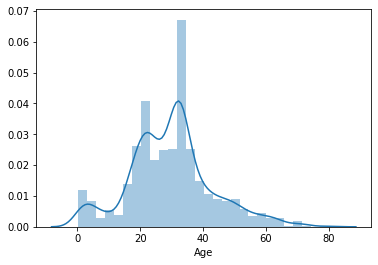

In [24]:
sns.distplot(input_dataframe["Age"], hist = True)

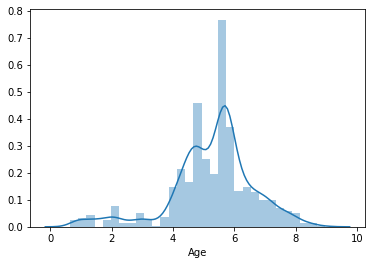

In [25]:
sns.distplot(input_dataframe["Age"].apply(np.sqrt), hist = True)

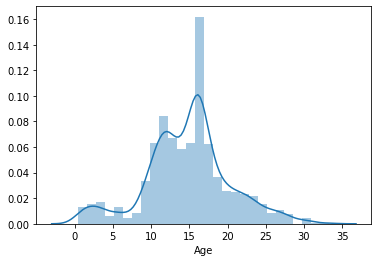

In [26]:
sns.distplot(input_dataframe["Age"].apply(lambda x: x**0.8), hist = True)

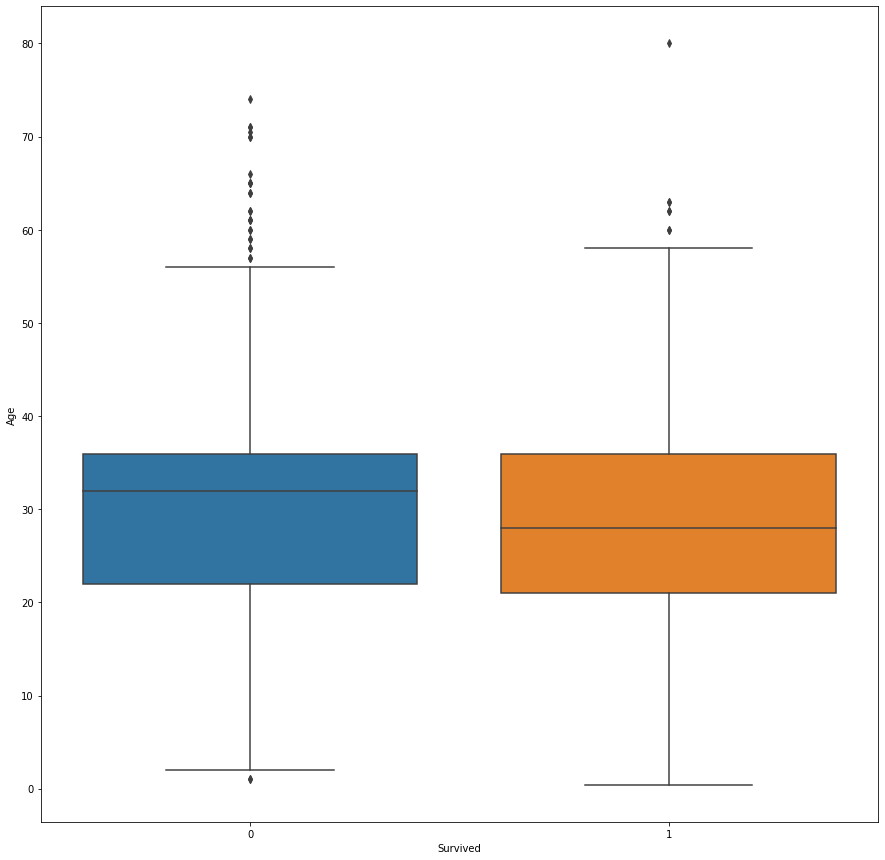

In [27]:
plt.figure(figsize = (15, 15))
sns.boxplot(y = "Age", x = "Survived", data = input_dataframe)

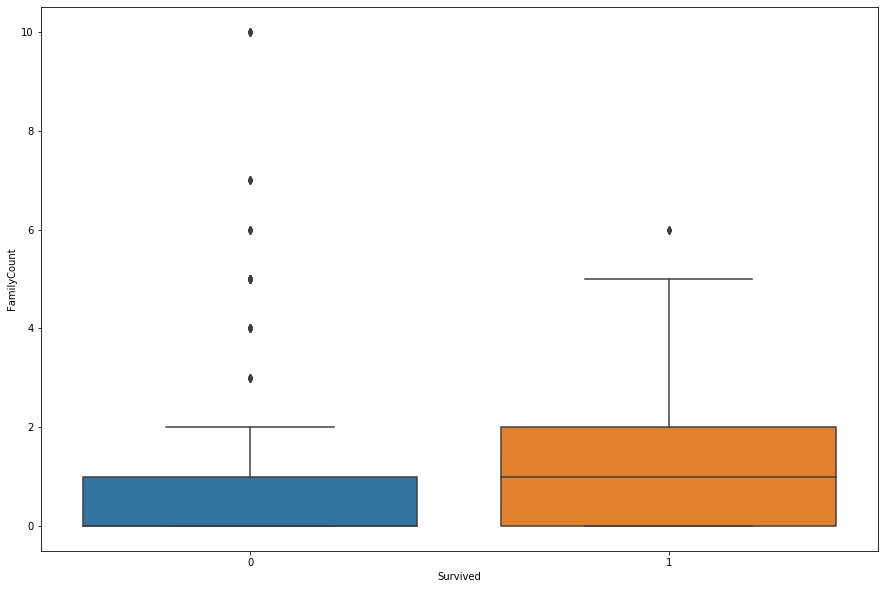

In [28]:
plt.figure(figsize = (15, 10))
sns.boxplot(y = "FamilyCount", x = "Survived", data = input_dataframe)

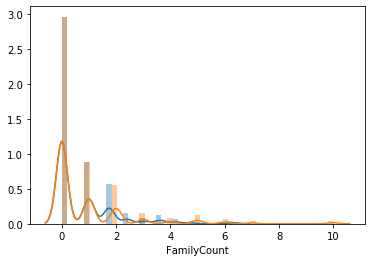

In [29]:
sns.distplot(input_dataframe["FamilyCount"].apply(lambda x: x**0.8), hist = True)
sns.distplot(input_dataframe["FamilyCount"], hist = True)

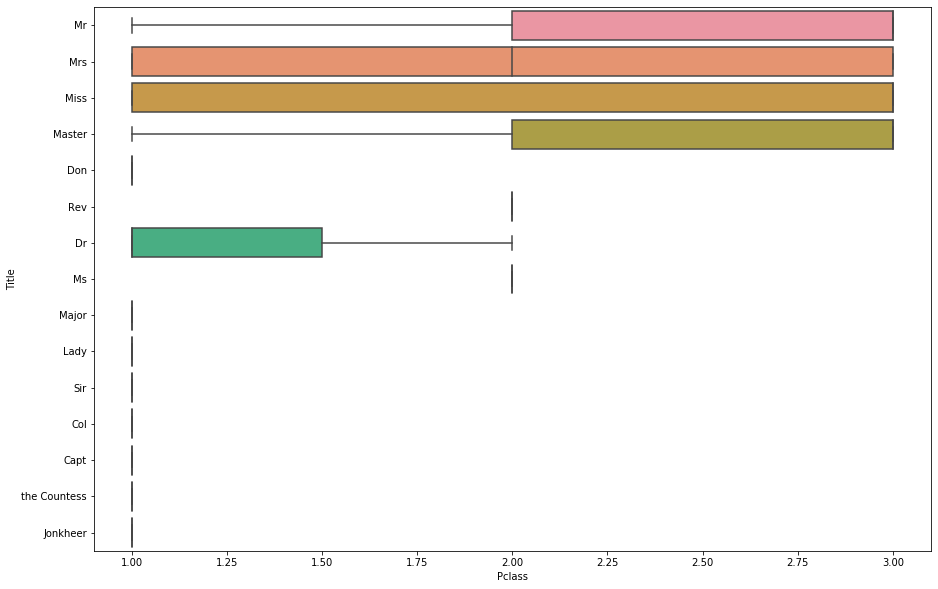

In [30]:
plt.figure(figsize = (15, 10))
sns.boxplot(y = "Title", x = "Pclass", data = input_dataframe)

In [31]:
input_dataframe.groupby("Pclass").Age.mean() 

Pclass
1    37.545097
2    29.911363
3    26.268776
Name: Age, dtype: float64

In [32]:
input_dataframe.groupby("Pclass")["Age", "Fare"].mean() 

,Age,Fare
Pclass,,
1,37.545097,84.154687
2,29.911363,20.662183
3,26.268776,13.675550


(array([ 40.,  18.,  15.,  31.,  79., 134.,  85.,  84., 209.,  45.,  36.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

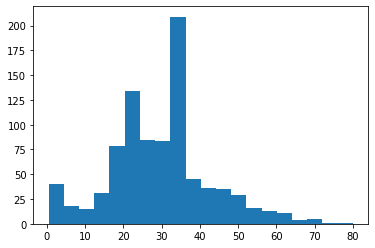

In [33]:
plt.hist(input_dataframe["Age"], bins = 20)

(array([ 24.,  20.,   7.,   7.,  14.,   3.,  12.,  30.,  51.,  40.,  79.,
         54.,  36.,  72.,  37., 151.,  58.,  18.,  29.,  20.,  14.,  26.,
         15.,  17.,   7.,  11.,   6.,   7.,   7.,   8.]),
 array([ 0.42      ,  2.53933333,  4.65866667,  6.778     ,  8.89733333,
        11.01666667, 13.136     , 15.25533333, 17.37466667, 19.494     ,
        21.61333333, 23.73266667, 25.852     , 27.97133333, 30.09066667,
        32.21      , 34.32933333, 36.44866667, 38.568     , 40.68733333,
        42.80666667, 44.926     , 47.04533333, 49.16466667, 51.284     ,
        53.40333333, 55.52266667, 57.642     , 59.76133333, 61.88066667,
        64.        ]),
 <a list of 30 Patch objects>)

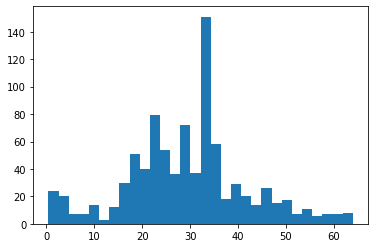

In [34]:
mask1 = (input_dataframe["Age"] < 65)
mask2 = (input_dataframe["Age"] > 5)
mask3 = mask1 & mask2
plt.hist(input_dataframe.loc[mask1, "Age"], bins = 30)

People with age more than 65 could be perceived as outliers, since without them the distribution resembles more towards gaussian

### ---- 5 Establishing a baseline ----

In [35]:
from pandas.plotting import scatter_matrix

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [36]:
#The ranks Capt, Col, Don, Dr, Jonkheer, Lady, Major, Rev, Sir, the Countess are expected to be high and more respected than usual people. They can be categorized into one higher rank category and have higher chance of survival<br>
higherRankedList = ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'the Countess']
input_dataframe["Title"].replace(higherRankedList, 'HighRank', inplace = True)

In [37]:
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        
         OneHotEncoder(), 
         ["Embarked"]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # do not apply anything to the remaining columns
)
# https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
onehot_encoded = transformer.fit_transform(input_dataframe)
onehot_encoded = pd.get_dummies(input_dataframe["Embarked"])
#input_dataframe.drop('Embarked', axis = 1, inplace = True)
#input_dataframe.join(onehot_encoded)


pca_embark = decomposition.PCA(n_components = 1)
sklearn_pca = pca_embark.fit_transform(onehot_encoded)
input_dataframe["Embarked"] = sklearn_pca

In [38]:
# code Title as one hot variable for the training
onehot_encoded = pd.get_dummies(input_dataframe["Title"])
#input_dataframe.drop('Title', axis = 1, inplace = True)
#input_dataframe.join(onehot_encoded)
onehot_encoded = StandardScaler().fit_transform(onehot_encoded)
pca_title = decomposition.PCA(n_components = 1)
sklearn_pca = pca_title.fit_transform(onehot_encoded)
input_dataframe["Title"] = sklearn_pca
input_dataframe

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,FamilyCount
PassengerId,,,,,,,,,
1,0,3,1,22.000000,A/5 21171,7.2500,-0.345059,-1.101431,1
2,1,1,0,38.000000,PC 17599,71.2833,1.043116,1.416484,1
3,1,3,0,26.000000,STON/O2. 3101282,7.9250,-0.345059,1.726125,0
4,1,1,0,35.000000,113803,53.1000,-0.345059,1.416484,1
5,0,3,1,35.000000,373450,8.0500,-0.345059,-1.101431,0
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,211536,13.0000,-0.345059,1.124662,0
888,1,1,0,19.000000,112053,30.0000,-0.345059,1.726125,0
889,0,3,0,21.773973,W./C. 6607,23.4500,-0.345059,1.726125,3


In [39]:
# code Title as one hot variable for the training
onehot_encoded = pd.get_dummies(input_dataframe["Title"])
#input_dataframe.drop('Title', axis = 1, inplace = True)
#input_dataframe.join(onehot_encoded)
#onehot_encoded = input_dataframe["Pclass"].join(onehot_encoded)
pca = decomposition.PCA(n_components = 1)
sklearn_pca = pca.fit_transform(onehot_encoded)

In [40]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

In [41]:
out_df = input_dataframe["Survived"]
input_dataframe.drop("Survived", axis=1, inplace = True)
input_dataframe.drop("Ticket", axis=1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(input_dataframe, out_df, test_size=0.01, random_state=66)

In [42]:
# training the data
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=4, max_depth=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, input_dataframe, out_df, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

print("=== All AUC Scores ===")

print(rfc_cv_score)
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[5 1]
 [0 3]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.75      1.00      0.86         3

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9



=== All AUC Scores ===
[0.82441558 0.90025974 0.78235294 0.89919786 0.92139037 0.87272727
 0.87754011 0.83048128 0.91818182 0.90332244]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8729869422516481


# Preparing the test results and geenerating data for submission

In [45]:
# Reading in the test data
test_dataframe = pd.read_csv("test.csv", encoding='utf-8')

# making the PassengerId the index column
test_dataframe.set_index('PassengerId', inplace = True)

# Dropping the cabin feature
test_dataframe.drop("Cabin", axis=1, inplace = True)

# encoding gender information as binary
test_dataframe["Sex"].replace('female', 0,inplace=True)
test_dataframe["Sex"].replace('male', 1,inplace=True)

# extracting out the titles from the names
splittedName = test_dataframe["Name"].str.split(",").tolist()
surnames = [name[0] for name in splittedName]
titles = [name[1].split(".")[0] for name in splittedName]
titles = [title.strip(" ") for title in titles]

test_dataframe.drop("Name", axis=1, inplace = True)
test_dataframe["Title"] = titles

#SibSp and Parch joined together to form the FamilyCount column
test_dataframe["FamilyCount"] = test_dataframe["SibSp"] + test_dataframe["Parch"]
test_dataframe.drop(["SibSp", "Parch"], axis=1, inplace = True)

#filling in the missing titles from the means obtained from the train set
for title in test_dataframe["Title"].unique():    
    if title in meanAgeDict:
        meanAgeTitle = meanAgeDict[title]  
    else:
        meanAgeTitle = np.mean(list(meanAgeDict.values()))
    currentMask = test_dataframe["Age"].isna() & (test_dataframe["Title"] == title)
    test_dataframe.loc[currentMask, 'Age'] = meanAgeTitle

# Replacing the High Rank titles and Madam and Mademoiselle
higherRankedList = ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'the Countess', 'Dona']
test_dataframe["Title"].replace(higherRankedList, 'HighRank', inplace = True)
test_dataframe["Title"].replace(['Mlle', 'Mme'], ['Miss', 'Mrs'], inplace = True)

# One hot encoding and running dimensionality reduction with pca on embarked data
onehot_encoded = pd.get_dummies(test_dataframe["Embarked"])
sklearn_pca = pca_embark.transform(onehot_encoded)
test_dataframe["Embarked"] = sklearn_pca

# One hot encoding and running dimensionality reduction with pca on title data
onehot_encoded = pd.get_dummies(test_dataframe["Title"])
sklearn_pca = pca_title.transform(onehot_encoded)
test_dataframe["Title"] = sklearn_pca

# dropping the Ticket column
test_dataframe.drop("Ticket", axis=1, inplace = True)

# filling remaining NaN values with the preceding row
test_dataframe.fillna(method='ffill', inplace = True)

# Predicting with the previously trained model
rfc_predict = rfc.predict(test_dataframe)

In [46]:
# Preparing the dataframe for exporting, combined of PassengerId and Survival information
result_dataframe = pd.DataFrame(test_dataframe.index)
result_dataframe['Survived'] = rfc_predict

In [47]:
# saving the test results for submission
result_dataframe.to_csv(path_or_buf = 'out.csv', index=False)